# Импорты

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# Чтение данных

Считаем данные и подготовим их к дальнейшему анализу

In [33]:
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
# df.head()

/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_60794/1338807228.py:1: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


In [34]:
with pd.option_context('display.max_columns',None):
    display(df.head())
df.info()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,N

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260701 entries, 0 to 2260700
Columns: 151 entries, id to settlement_term
dtypes: float64(113), object(38)
memory usage: 2.5+ GB


- 'installment' - ежемесячный платеж по кредиту
- 'annual_inc' - годовой доход заемщика

In [35]:
df['installment']

0          123.03
1          820.28
2          432.66
3          829.90
4          289.91
            ...  
2260696    859.56
2260697    564.56
2260698    329.33
2260699       NaN
2260700       NaN
Name: installment, Length: 2260701, dtype: float64

In [36]:
df['annual_inc']

0           55000.0
1           65000.0
2           63000.0
3          110000.0
4          104433.0
             ...   
2260696    227000.0
2260697    110000.0
2260698     95000.0
2260699         NaN
2260700         NaN
Name: annual_inc, Length: 2260701, dtype: float64

In [37]:
df['new_criteria'] = df['installment'] / (df['annual_inc']/12)

In [38]:
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,new_criteria
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.026843
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.151436
2,68341763,NaN,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.082411
3,66310712,NaN,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.090535
4,68476807,NaN,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.033312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260696,88985880,NaN,40000.0,40000.0,40000.0,60 months,10.49,859.56,B,B3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.045439
2260697,88224441,NaN,24000.0,24000.0,24000.0,60 months,14.49,564.56,C,C4,...,NaN,Cash,Y,Mar-2019,ACTIVE,Mar-2019,10000.0,44.82,1.0,0.061588
2260698,88215728,NaN,14000.0,14000.0,14000.0,60 months,14.49,329.33,C,C4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0.041600
2260699,Total amount funded in policy code 1: 1465324575,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
new_df = df[['new_criteria', 'issue_d']]

In [40]:
new_df['issue_d'].unique()

array(['Dec-2015', 'Nov-2015', 'Oct-2015', 'Sep-2015', 'Aug-2015',
       'Jul-2015', 'Jun-2015', 'May-2015', 'Apr-2015', 'Mar-2015',
       'Feb-2015', 'Jan-2015', nan, 'Mar-2018', 'Feb-2018', 'Jan-2018',
       'Sep-2017', 'Aug-2017', 'Jul-2017', 'Jun-2016', 'May-2016',
       'Apr-2016', 'Sep-2018', 'Aug-2018', 'Jul-2018', 'Jun-2017',
       'May-2017', 'Apr-2017', 'Mar-2016', 'Feb-2016', 'Jan-2016',
       'Dec-2014', 'Nov-2014', 'Oct-2014', 'Sep-2014', 'Aug-2014',
       'Jul-2014', 'Jun-2014', 'May-2014', 'Apr-2014', 'Mar-2014',
       'Feb-2014', 'Jan-2014', 'Dec-2018', 'Nov-2018', 'Oct-2018',
       'Jun-2018', 'May-2018', 'Apr-2018', 'Dec-2011', 'Nov-2011',
       'Oct-2011', 'Sep-2011', 'Aug-2011', 'Jul-2011', 'Jun-2011',
       'May-2011', 'Apr-2011', 'Mar-2011', 'Feb-2011', 'Jan-2011',
       'Dec-2010', 'Nov-2010', 'Oct-2010', 'Sep-2010', 'Aug-2010',
       'Jul-2010', 'Jun-2010', 'May-2010', 'Apr-2010', 'Mar-2010',
       'Feb-2010', 'Jan-2010', 'Dec-2009', 'Nov-2009', 'O

Разобьем на временные интервалы по 2 месяца

In [41]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Создем новый датафрейм
new_df = df[['new_criteria', 'issue_d']]

# Преобразуем столбец 'issue_d' в тип данных datetime
new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')
new_df.set_index('issue_d', inplace=True)

# Разделяем данные на промежутки по 2 месяца
time_ranges = pd.date_range(start=new_df.index.min(), end=new_df.index.max(), freq='2M')

ks_values = []
variances = []
iqr_values = []

# Пройдемся по каждому промежутку времени
for i in range(len(time_ranges)-1):
    start_date = time_ranges[i]
    end_date = time_ranges[i+1]
    
    subset = new_df.loc[(new_df.index >= start_date) & (new_df.index < end_date), 'new_criteria']
    
    # Рассчитаем критерий Колмогорова-Смирнова между текущим промежутком и всей выборкой
    ks_value, _ = ks_2samp(subset, new_df['new_criteria'])
    ks_values.append(ks_value)
    
    # Рассчитаем дисперсию и межквартильный размах для текущего промежутка
    variance = np.var(subset)
    variances.append(variance)
    iqr_value = np.percentile(subset, 75) - np.percentile(subset, 25)
    iqr_values.append(iqr_value)
    
results_df_2_m = pd.DataFrame({
    'Time Range': [f'{time_ranges[i].strftime("%b %Y")} - {time_ranges[i+1].strftime("%b %Y")}' for i in range(len(time_ranges)-1)],
    'KS Value': ks_values,
    'Variance': variances,
    'IQR': iqr_values
})

print(results_df_2_m)


/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_60794/2477258918.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')


             Time Range  KS Value  Variance       IQR
0   Jun 2007 - Aug 2007  0.311487  0.006490       NaN
1   Aug 2007 - Oct 2007  0.167787  0.002152  0.067879
2   Oct 2007 - Dec 2007  0.118635  0.003038  0.069851
3   Dec 2007 - Feb 2008  0.099943  0.002322  0.060589
4   Feb 2008 - Apr 2008  0.165649  0.001766  0.054401
..                  ...       ...       ...       ...
63  Dec 2017 - Feb 2018  0.047175       NaN  0.066149
64  Feb 2018 - Apr 2018  0.046566       NaN  0.066526
65  Apr 2018 - Jun 2018  0.042923       NaN  0.065482
66  Jun 2018 - Aug 2018  0.037435       NaN  0.063866
67  Aug 2018 - Oct 2018  0.033304       NaN  0.062698

[68 rows x 4 columns]


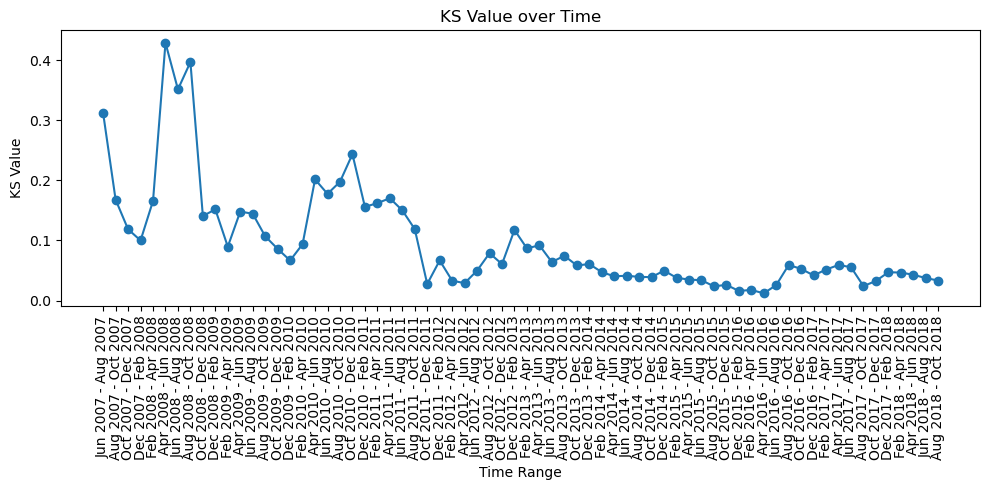

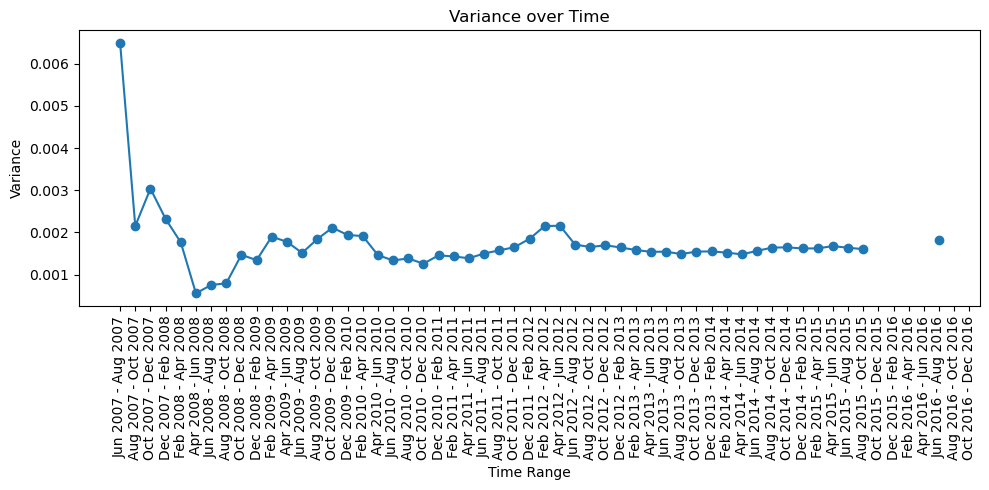

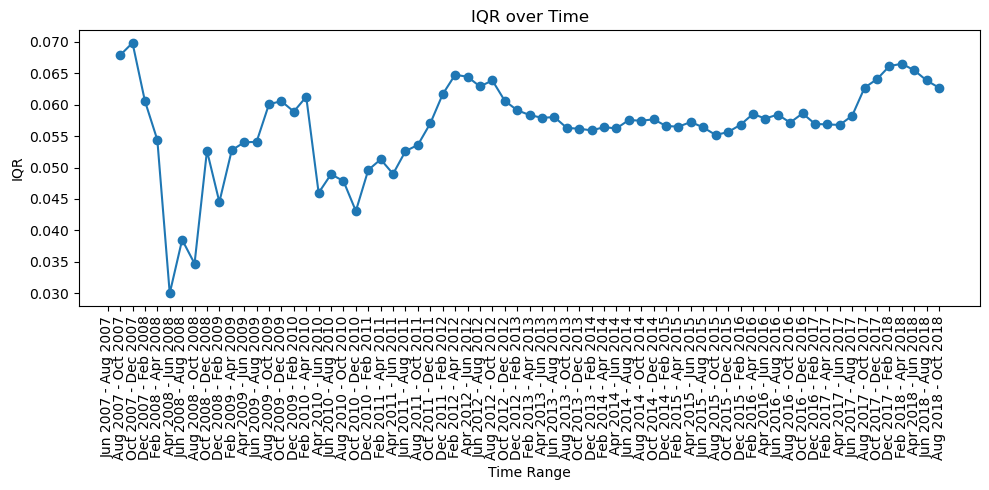

In [42]:
import matplotlib.pyplot as plt

# Извлекаем данные из DataFrame
time_range = results_df_2_m["Time Range"]
ks_values = results_df_2_m["KS Value"]
variances = results_df_2_m["Variance"]
iqrs = results_df_2_m["IQR"]

# Создаем график KS Value
plt.figure(figsize=(10, 5))
plt.plot(time_range, ks_values, marker='o')
plt.xlabel('Time Range')
plt.ylabel('KS Value')
plt.title('KS Value over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график Variance
plt.figure(figsize=(10, 5))
plt.plot(time_range, variances, marker='o')
plt.xlabel('Time Range')
plt.ylabel('Variance')
plt.title('Variance over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график IQR
plt.figure(figsize=(10, 5))
plt.plot(time_range, iqrs, marker='o')
plt.xlabel('Time Range')
plt.ylabel('IQR')
plt.title('IQR over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Интерпретируем полученные результатты:

- Высокие значения KS Value указывают на схожесть распределений между различными периодами. Это может свидетельствовать о стабильности данных или отсутствии значительных изменений во времени.

- Более высокие значения дисперсии и интерквартильного размаха могут указывать на более широкий разброс значений и большую изменчивость данных в определенные периоды. Это может указывать на наличие сезонных паттернов или влияние факторов, которые вызывают большие колебания в данных.

Разобьем на временные интервалы по 6 месяцев

In [43]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Создем новый датафрейм
new_df = df[['new_criteria', 'issue_d']]

# Преобразуем столбец 'issue_d' в тип данных datetime
new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')
new_df.set_index('issue_d', inplace=True)

# Разделяем данные на промежутки по 6 месяца
time_ranges = pd.date_range(start=new_df.index.min(), end=new_df.index.max(), freq='6M')

ks_values = []
variances = []
iqr_values = []

# Пройдемся по каждому промежутку времени
for i in range(len(time_ranges)-1):
    start_date = time_ranges[i]
    end_date = time_ranges[i+1]
    
    subset = new_df.loc[(new_df.index >= start_date) & (new_df.index < end_date), 'new_criteria']
    
    # Рассчитаем критерий Колмогорова-Смирнова между текущим промежутком и всей выборкой
    ks_value, _ = ks_2samp(subset, new_df['new_criteria'])
    ks_values.append(ks_value)
    
    # Рассчитаем дисперсию и межквартильный размах для текущего промежутка
    variance = np.var(subset)
    variances.append(variance)
    iqr_value = np.percentile(subset, 75) - np.percentile(subset, 25)
    iqr_values.append(iqr_value)
    
results_df_6_m = pd.DataFrame({
    'Time Range': [f'{time_ranges[i].strftime("%b %Y")} - {time_ranges[i+1].strftime("%b %Y")}' for i in range(len(time_ranges)-1)],
    'KS Value': ks_values,
    'Variance': variances,
    'IQR': iqr_values
})

print(results_df_6_m)


/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_60794/3478900248.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')


             Time Range  KS Value  Variance       IQR
0   Jun 2007 - Dec 2007  0.161344  0.003624       NaN
1   Dec 2007 - Jun 2008  0.172085  0.001906  0.053856
2   Jun 2008 - Dec 2008  0.242228  0.001233  0.046357
3   Dec 2008 - Jun 2009  0.116162  0.001702  0.050853
4   Jun 2009 - Dec 2009  0.103989  0.001874  0.058328
5   Dec 2009 - Jun 2010  0.122318  0.001776  0.054869
6   Jun 2010 - Dec 2010  0.202932  0.001330  0.046444
7   Dec 2010 - Jun 2011  0.161678  0.001425  0.050083
8   Jun 2011 - Dec 2011  0.087852  0.001610  0.055369
9   Dec 2011 - Jun 2012  0.035835  0.002071  0.063882
10  Jun 2012 - Dec 2012  0.061157  0.001688  0.062353
11  Dec 2012 - Jun 2013  0.096326  0.001586  0.058324
12  Jun 2013 - Dec 2013  0.064843  0.001527  0.056856
13  Dec 2013 - Jun 2014  0.048476  0.001518  0.056285
14  Jun 2014 - Dec 2014  0.039742  0.001616  0.057566
15  Dec 2014 - Jun 2015  0.040408  0.001641  0.056771
16  Jun 2015 - Dec 2015  0.022405       NaN  0.055745
17  Dec 2015 - Jun 2016  0.0

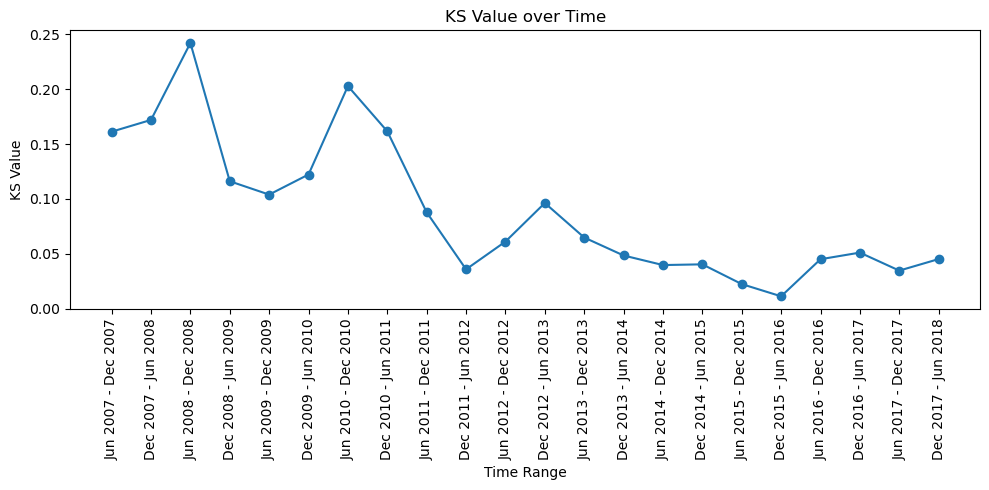

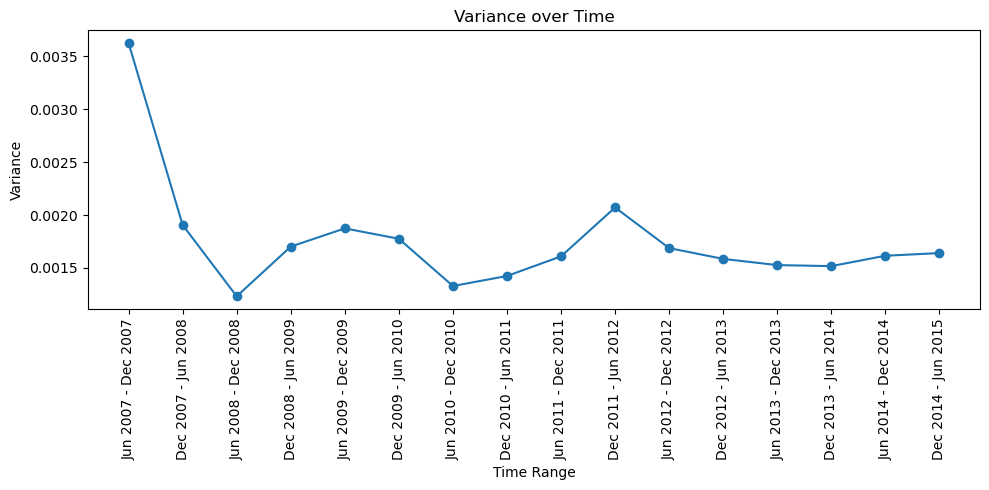

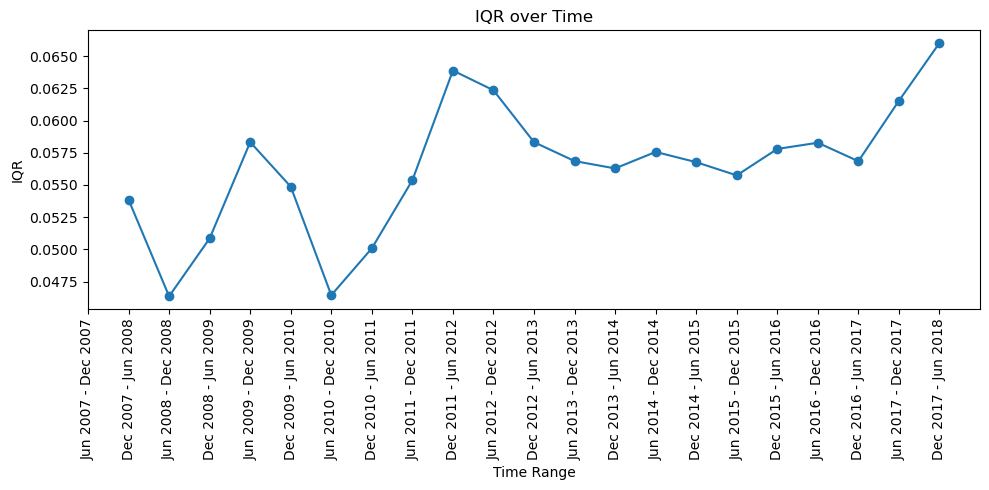

In [44]:
import matplotlib.pyplot as plt

# Извлекаем данные из DataFrame
time_range = results_df_6_m["Time Range"]
ks_values = results_df_6_m["KS Value"]
variances = results_df_6_m["Variance"]
iqrs = results_df_6_m["IQR"]

# Создаем график KS Value
plt.figure(figsize=(10, 5))
plt.plot(time_range, ks_values, marker='o')
plt.xlabel('Time Range')
plt.ylabel('KS Value')
plt.title('KS Value over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график Variance
plt.figure(figsize=(10, 5))
plt.plot(time_range, variances, marker='o')
plt.xlabel('Time Range')
plt.ylabel('Variance')
plt.title('Variance over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график IQR
plt.figure(figsize=(10, 5))
plt.plot(time_range, iqrs, marker='o')
plt.xlabel('Time Range')
plt.ylabel('IQR')
plt.title('IQR over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


В различных периодах исследуемого временного ряда были обнаружены различия в распределении данных. Некоторые периоды имеют более значительные различия между распределениями, что отражается в более высоких значениях KS-статистики. Также можно заметить, что в разных периодах наблюдается разная степень разброса данных, что отражается в значениях дисперсии и межквартильного размаха.

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import ks_2samp

# Создем новый датафрейм
new_df = df[['new_criteria', 'issue_d']]

# Преобразуем столбец 'issue_d' в тип данных datetime
new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')
new_df.set_index('issue_d', inplace=True)

# Разделяем данные на промежутки по году
time_ranges = pd.date_range(start=new_df.index.min(), end=new_df.index.max(), freq='12M')

ks_values = []
variances = []
iqr_values = []

# Пройдемся по каждому промежутку времени
for i in range(len(time_ranges)-1):
    start_date = time_ranges[i]
    end_date = time_ranges[i+1]
    
    subset = new_df.loc[(new_df.index >= start_date) & (new_df.index < end_date), 'new_criteria']
    
    # Рассчитаем критерий Колмогорова-Смирнова между текущим промежутком и всей выборкой
    ks_value, _ = ks_2samp(subset, new_df['new_criteria'])
    ks_values.append(ks_value)
    
    # Рассчитаем дисперсию и межквартильный размах для текущего промежутка
    variance = np.var(subset)
    variances.append(variance)
    iqr_value = np.percentile(subset, 75) - np.percentile(subset, 25)
    iqr_values.append(iqr_value)
    
results_df_1_y = pd.DataFrame({
    'Time Range': [f'{time_ranges[i].strftime("%b %Y")} - {time_ranges[i+1].strftime("%b %Y")}' for i in range(len(time_ranges)-1)],
    'KS Value': ks_values,
    'Variance': variances,
    'IQR': iqr_values
})

print(results_df_1_y)


/var/folders/dm/ltzh8my50bvc6cdr0_wggrjr0000gq/T/ipykernel_60794/439489223.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['issue_d'] = pd.to_datetime(new_df['issue_d'], format='%b-%Y')


             Time Range  KS Value  Variance       IQR
0   Jun 2007 - Jun 2008  0.165302  0.002389       NaN
1   Jun 2008 - Jun 2009  0.154038  0.001590  0.050447
2   Jun 2009 - Jun 2010  0.112359  0.001815  0.056240
3   Jun 2010 - Jun 2011  0.179470  0.001386  0.048595
4   Jun 2011 - Jun 2012  0.028841  0.001923  0.060954
5   Jun 2012 - Jun 2013  0.079891  0.001629  0.059835
6   Jun 2013 - Jun 2014  0.054693  0.001522  0.056505
7   Jun 2014 - Jun 2015  0.039948  0.001630  0.057160
8   Jun 2015 - Jun 2016  0.016546       NaN  0.056831
9   Jun 2016 - Jun 2017  0.047948       NaN  0.057547
10  Jun 2017 - Jun 2018  0.032735       NaN  0.063785


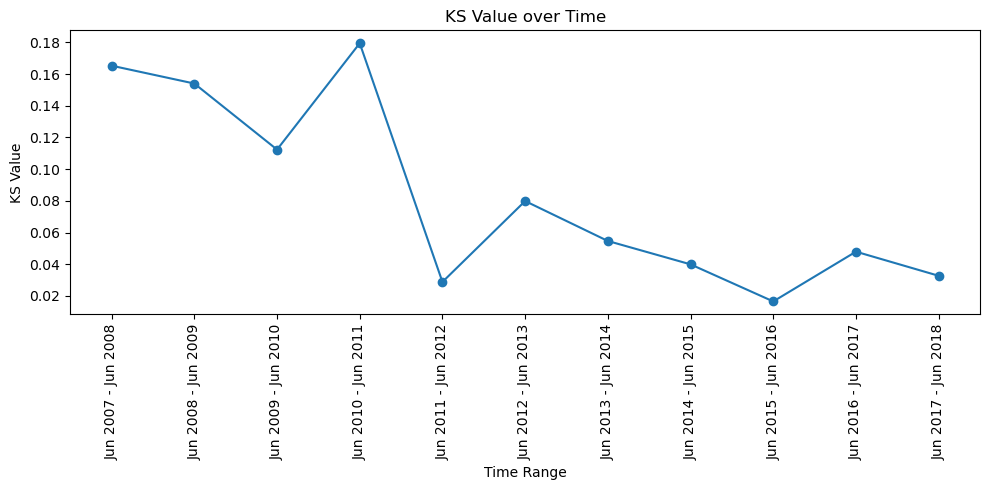

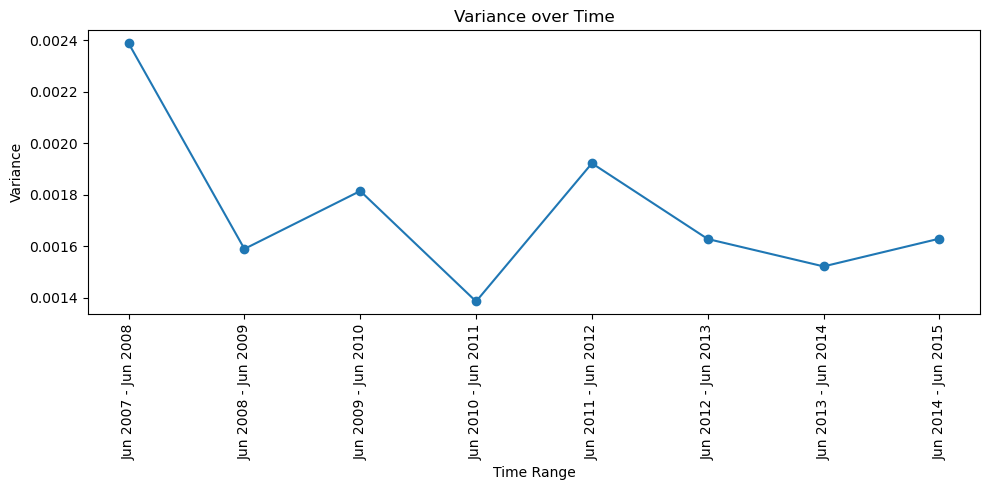

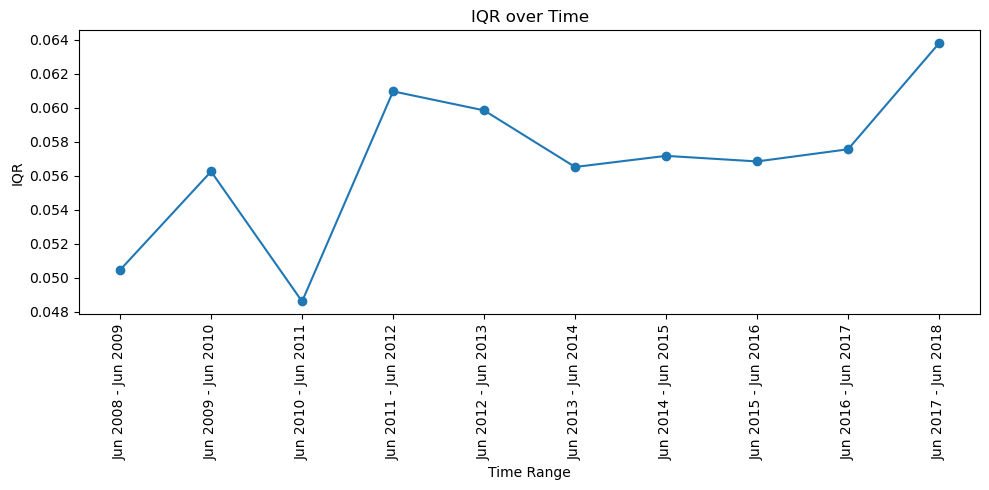

In [46]:
import matplotlib.pyplot as plt

# Извлекаем данные из DataFrame
time_range = results_df_1_y["Time Range"]
ks_values = results_df_1_y["KS Value"]
variances = results_df_1_y["Variance"]
iqrs = results_df_1_y["IQR"]

# Создаем график KS Value
plt.figure(figsize=(10, 5))
plt.plot(time_range, ks_values, marker='o')
plt.xlabel('Time Range')
plt.ylabel('KS Value')
plt.title('KS Value over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график Variance
plt.figure(figsize=(10, 5))
plt.plot(time_range, variances, marker='o')
plt.xlabel('Time Range')
plt.ylabel('Variance')
plt.title('Variance over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Создаем график IQR
plt.figure(figsize=(10, 5))
plt.plot(time_range, iqrs, marker='o')
plt.xlabel('Time Range')
plt.ylabel('IQR')
plt.title('IQR over Time')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [47]:
results_df_6_m.to_csv('annual_inc-сloan_amnt_6m.csv')

In [48]:
results_df_2_m.to_csv('annual_inc-сloan_amnt_2m.csv')

In [49]:
results_df_1_y.to_csv('annual_inc-сloan_amnt_1y.csv')

In [50]:
new_df


,new_criteria
issue_d,
2015-12-01,0.026843
2015-12-01,0.151436
2015-12-01,0.082411
2015-12-01,0.090535
2015-12-01,0.033312
...,...
2016-10-01,0.045439
2016-10-01,0.061588
2016-10-01,0.041600
